# Facial Emotion based Music Recommendation System

## Imports

In [1]:
import threading
from utilities import *

## System

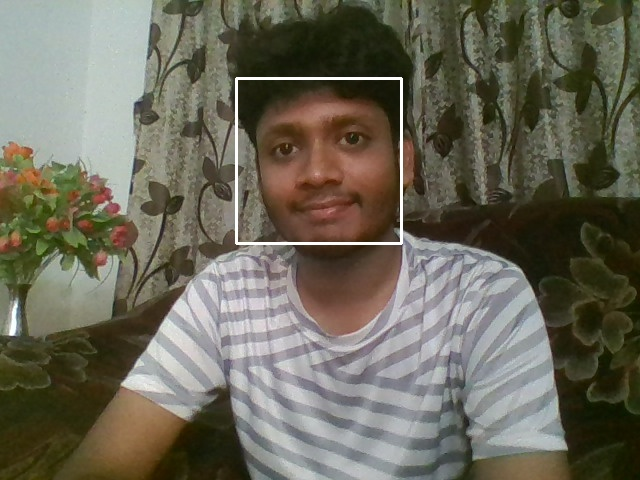

.....
Camera is open!
.....
Converting frame to grayscale.
.....
Displaying Video.
.....
Detecting the face.
.....
Selecting the region of interest.
.....
Coping the image.
.....
Reshaping the image.
.....
Emotion Recognition using fernet.
.....
Emotion Classification using fernet.
.....
Emotion classified is Happy !!!
.....
Fetching the song data from database.
.....
Recommending songs !!!


,track_id,track_name,artist_name
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd
1,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles
2,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars
3,4RVwu0g32PAqgUiJoXsdF8,Happier Than Ever,Billie Eilish
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran


.....
Play the playlist !!!


[Blinding Lights](https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b)

[Watermelon Sugar](https://open.spotify.com/track/6UelLqGlWMcVH1E5c4H7lY)

[Locked out of Heaven](https://open.spotify.com/track/3w3y8KPTfNeOKPiqUTakBh)

[Happier Than Ever](https://open.spotify.com/track/4RVwu0g32PAqgUiJoXsdF8)

[Photograph](https://open.spotify.com/track/1HNkqx9Ahdgi1Ixy2xkKkL)

In [2]:
def system(stopButton):
    
    cap = cv2.VideoCapture(0)
    display_handle = display(None, display_id=True)
    
    while True:
        print('.'*5)
        print('Camera is open!')    
        sus, frame = cap.read()
        
        print('.'*5)
        print('Converting frame to grayscale.')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        print('.'*5)
        print('Displaying Video.')
        sus, frame_dis = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame_dis.tobytes()))
        
        print('.'*5)
        print('Detecting the face.')
        faces = cascade.detectMultiScale(gray,1.3,2)
        
        print('.'*5)
        print('Selecting the region of interest.')
        for (x, y, w, h) in faces:
            ret = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
            sus, frame_ret = cv2.imencode('.jpeg', ret)
            display_handle.update(Image(data=frame_ret))
        
        print('.'*5)
        print('Coping the image.')
        for x,y,w,h in faces:   
            roi = gray[y:y+h, x:x+w]
            roi = cv2.imwrite("face.jpg", roi)
            time.sleep(0.1)
            
        print('.'*5)
        print('Reshaping the image.')    
        roi = np.reshape((cv2.resize(roi, (48,48))) / 255.0, (1,48,48,1))
        
        print('.'*5)
        print('Emotion Recognition using fernet.')
        model_pred = fernet.predict(roi, verbose=0)
        
        print('.'*5)
        print('Emotion Classification using fernet.')
        label = np.where(model_pred > 0.5, 1, 0)
        
        print('.'*5)
        emotion = label_map[label[0][0]]
        print('Emotion classified is', emotion, '!!!')
        
        print('.'*5)
        print('Fetching the song data from database.')
        song_data = connect_db()
        
        print('.'*5)
        print('Recommending songs !!!')
        song_data = recommend_songs(emotion, song_data)
        display(song_data)
        
        print('.'*5)
        print('Play the playlist !!!')
        play_song(song_data)
        
        if stopButton.value==False:
            stopButton.value==True
            cap.release()
        
        time.sleep(10*10*10*10)

thread = threading.Thread(target=system, args=(stopButton,))
thread.start()

`Created the Facial Emotion based Music Recommendation System`